Author : Anand Veerarahavan

Naive Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.


Import the libraries

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Seperating features and target variables

<function make_blobs at 0x7f22c83943b0>


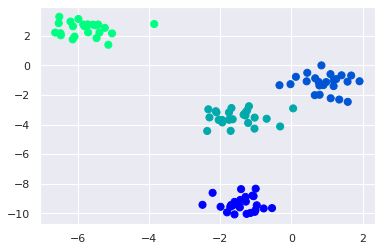

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100 , 2 , centers =4, random_state = 2, cluster_std=0.5)

print(make_blobs)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='winter')

**Gaussian Naive Bayes**

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(-7.060940764725452,
 2.3381471896605026,
 -10.743428464356715,
 3.955804605525034)

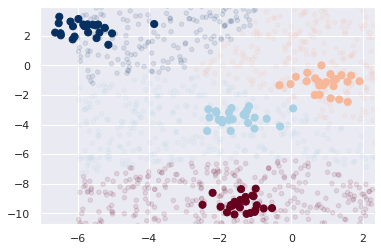

In [7]:
plt.scatter(X[:,0], X[:,1],c =y, s= 50, cmap ='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c = ynew, s = 20, cmap ='RdBu', alpha= 0.1)
plt.axis(lim)

**Multinomial Naive Bayes**

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

Import the libraries

In [10]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


Train test split

In [11]:
categories = ['soc.religion.christian', 'rec.motorcycles',
              'sci.space', 'comp.graphics','rec.sport.baseball','talk.politics.misc','sci.electronics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Visualize training data

In [12]:
print(train.data[9])
print(train.data[4])

From: bohja@cnsvax.uwec.edu
Subject: WITCHES AND WICCAN:  your opinion
Organization: University of Wisconsin Eau Claire
Lines: 19

I am a student at UW-Eau Claire.  I am doing a paper an witches and wanted to
get your point of view.  I will not use you name unless you specifically tell
me to do so.

Please answer this question:

As a Christian, are you offended by witches and Wiccan?  Do you feel that tehy
are pagan in the evil sense of the word?

You time and cooperation is appreciated.  Thanks, J.

-This survey is being conducted in partial fulfillment of the course
requirements for Engl 201, taught by Karen Welch at the University of
Wisconsin-Eau Claire.  This course is in compliance with the course
certification requirements of the University Institutional Review Board for the
PRotection of Human Subjects.

[but is it in compliance with any reasonable method for choosing
samples???  --clh]

From: jbh55289@uxa.cso.uiuc.edu (Josh Hopkins)
Subject: RIMSAT, US/Russian joint venture
Or

In [13]:
print(train.data[19],train.target[19])

From: karplus@cse.ucsc.edu (Kevin Karplus)
Subject: Re: decoupling caps - onboard
Organization: University of California, Santa Cruz
Lines: 38
Reply-To: karplus@ce.ucsc.edu (Kevin Karplus)
NNTP-Posting-Host: ararat.ucsc.edu


I've used on-chip capacitors to reduce ground-bounce noise on a small
systolic array chip that had 50pF loads on the clock lines.
(Design was in 2-micron n-well cmos, using the MOSIS scalable design rules.)
Here are some thoughts on the bypass capacitors:

1) They don't help much with simultaneous output switching--there is
	still a large inductance between the bypass capacitor and the
	load capacitor (on both the signal line and the ground
	return), so you still get ground and power line bounce. 

2) They do help a lot with on-chip loads, as I had with the high load
	on the clock lines. 

3) The transients you are trying to suppress are really high
	frequency, so forget about large areas of poly-thin-oxide-diff
	capacitors, since the RC time constant is too large

In [14]:
print(train.data[100])

From: horne@cs.utexas.edu (Patrick J. Horne)
Subject: Thermal fuse supplier wanted
Organization: CS Dept, University of Texas at Austin
Lines: 21
NNTP-Posting-Host: im4u.cs.utexas.edu
Keywords: MITI

I have a thermal fuse from a Apple Laserwriter II power supply (Made
by Cannon) that I need to replace.  The fuse is not the standard
tubular thermal fuse like those found in hair driers etc, but is a 
rectangular plastic package, much like a transistor or diode.  It
is about 0.2"x0.2"x0.1", with both leads coming out of one of the
0.1"x0.1" sides.  I have been told that it was made by MITI, a asian
company, but I can find no information as to a supplier.  This fuse
is rated at 1A, 130C.  Does anyone have a source for this fuse?  I
only need 5 or so, which means that the manufacturer wouldn't even want
to talk to me, let alone, deal with me.

Please advise via E-mail.

Thanks,
Pat

-- 
---  I like boats and bicycles, they're healthier than Valium  ---
Pat Horne, Network Manager, Shop Super

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [16]:
model.fit(train.data, train.target)
labels = model.predict(test.data)
print(labels)

[4 5 4 ... 5 1 1]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(test.target,labels))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       389
           1       0.94      0.97      0.96       398
           2       0.96      0.96      0.96       397
           3       0.93      0.76      0.84       393
           4       0.88      0.92      0.90       394
           5       0.63      0.98      0.77       398
           6       0.98      0.57      0.72       310

    accuracy                           0.86      2679
   macro avg       0.90      0.85      0.86      2679
weighted avg       0.89      0.86      0.86      2679



Text(89.18, 0.5, 'Predicted Label')

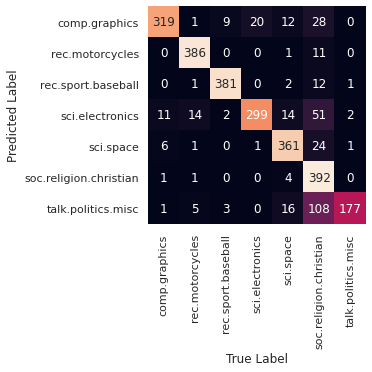

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat, square = True, annot =True, fmt='d', cbar=False, xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. Here's a quick utility function that will return the prediction for a single string.

In [20]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

In [21]:
predict_category('Jesus loves us all')

[5]


'soc.religion.christian'

In [22]:
predict_category('Will the mets win this season and touchbase?')

[2]


'rec.sport.baseball'

In [24]:
predict_category('Global warming is caused by pollution says some sources.The world leaders have gathered to discuss this at the G7 meet')

[5]


'soc.religion.christian'

In [25]:
predict_category('Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about misc.politics and talk about Christianity.')

[5]


'soc.religion.christian'

### Summary


**Advantages**

1. It is not only a simple approach but also a fast and accurate method for prediction.
2. Naive Bayes has very low computation cost.
3. It can efficiently work on a large dataset.
4. It performs well in case of discrete response variable compared to the continuous variable.
5. It can be used with multiple class prediction problems.
6. It also performs well in the case of text analytics problems.
7. When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.

**Disadvantages**

1. The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
2. If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.